## Exercice 1

*Note : These are my solutions for Coursera ML Course IN Python *

In [1]:
import numpy as np 
import pandas as pd 
import random 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
from __future__ import division
from __future__ import print_function

In [3]:
df = pd.read_csv("ex1data1.txt",sep=",",names=["population","profit"])

In [4]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
usual = Series(np.array([1]*len(df)),name="usual")

In [6]:
df = pd.concat([df, usual],1)

In [7]:
df = df.take([2,0,1],1)

In [8]:
df.head()

,usual,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
X = df[df.columns[:2]]

In [10]:
y = df[df.columns[2]]
y = DataFrame(y)

In [11]:
m = len(df)
m

97

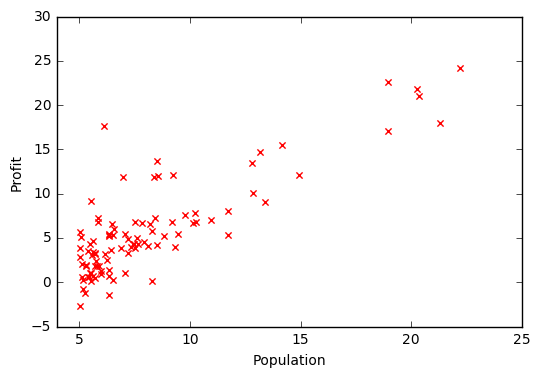

In [12]:
plt.scatter(df["population"],df["profit"],marker="x",color="red")
plt.axis([4,25,-5,30])
plt.xlabel("Population")
plt.ylabel("Profit")

In [13]:
theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01 # learning rate 


In [14]:
def computeCost(X,y,theta): 
    """ Compute the cost function for a specific theta """ 
    j = np.sum((np.matmul(X,theta) - y)**2)
    J = ( 0.5 / m ) * j 
    return J

In [15]:
computeCost(X,y,theta)


profit    32.072734
dtype: float64

In [19]:
cost_iter =  {}
thetas = {}

To read about Gradient descent : 
https://en.wikipedia.org/wiki/Gradient_descent

In [20]:
def gradientDescent(X, y, theta = np.zeros((2,1))): 
    i = 0 
    while i < iterations:
        tmp_zero  = theta[0] - ( alpha / m ) * np.sum((np.matmul(X, theta) - y))
        tmp_one   = theta[1] - ( alpha / m ) * np.sum(((np.matmul(X, theta) - y)["profit"] * X["population"]))
        
        theta[0] = tmp_zero
        theta[1] = tmp_one
        thetas[float(tmp_zero)] = float(tmp_one)

        J = computeCost(X,y,theta)
        #print("Iteration {0} : Cost {1}".format(i,J))
        cost_iter[i] = J
        #thetas[theta[0]] = theta[1]
        i += 1
    return theta


In [21]:
theta_min = gradientDescent(X, y);
theta_min


array([[-3.63029144],
       [ 1.16636235]])

In [22]:
import math 

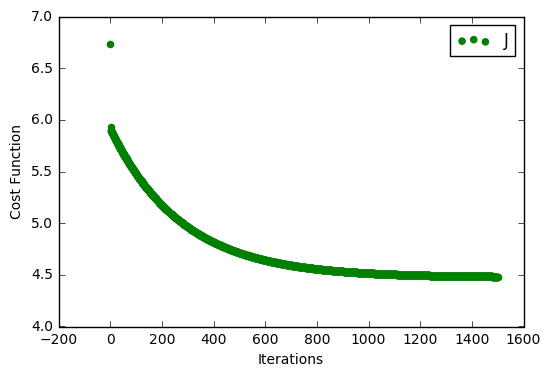

In [23]:
# ploting cost function in regard of iterations 

plt.scatter(cost_iter.keys(), cost_iter.values(), color="green")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.legend("J")

In [24]:
theta_min

array([[-3.63029144],
       [ 1.16636235]])

In [25]:
def predict(x):
    return theta_min[0] + theta_min[1] * x

In [26]:
linreg = predict(X["population"])

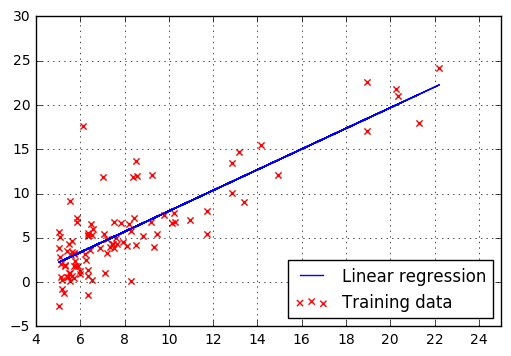

In [27]:
plt.axis([4,25,-5,30])
plt.xticks(np.arange(4,25,2))
plt.scatter(df["population"],df["profit"],marker="x",color="r")
plt.plot(df["population"],linreg,"b")
plt.legend(["Linear regression","Training data"],loc=4)
plt.grid()

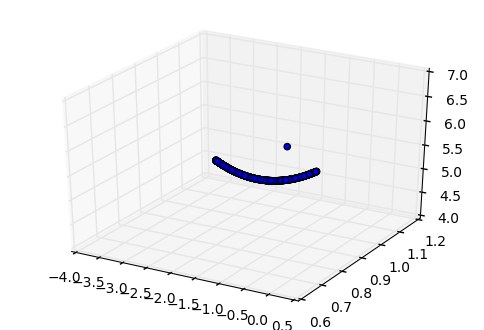

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

myxs, myys, myzs = [], [], []
myxs = thetas.keys()
myys = thetas.values()
for k,i in enumerate(myxs):
    myzs.append(computeCost(X, y, np.array([[myxs[k]],[myys[k]]])))


ax.scatter(myxs, myys, myzs)


In [39]:
len(myxs[::2])

750